# Session 2 Exercise Notebook: Data Merging, Transformation, and Exploratory Data Analysis (EDA)
In this notebook, you will apply data merging, transformation, and EDA techniques on the Titanic dataset. Complete each task step by step. Hints are provided where necessary.


## Task 1: Grouping and Aggregation
- Group the Titanic dataset by 'Pclass' and 'Sex'.
- Calculate the average fare and survival rate for each group.
- Display the result in a new DataFrame.

### Hint:
You can use `.groupby()` to group the data and `.agg()` to apply multiple aggregation functions.


In [ ]:
# Group by 'Pclass' and 'Sex' and calculate the average fare and survival rate

import pandas as pd
import numpy as np
titan_data = pd.read_csv('C:\\Users\\Tania\\Documents\\_Data Analysis\\_ReDI 2024\\Titanic\\Titanic-Dataset.csv')
titan_gr = titan_data.groupby(['Pclass','Sex'])

count_for_titangr = titan_gr.size()
print(count_for_titangr)


Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64


In [4]:
result = titan_data.groupby(['Pclass', 'Sex']).agg(
    survival_rate=('Survived', 'mean'),   # Average survival rate
    average_age=('Age', 'mean'),          # Average age
    count=('PassengerId', 'count')        # Count of passengers
)

print(result)

               survival_rate  average_age  count
Pclass Sex                                      
1      female       0.968085    34.611765     94
       male         0.368852    41.281386    122
2      female       0.921053    28.722973     76
       male         0.157407    30.740707    108
3      female       0.500000    21.750000    144
       male         0.135447    26.507589    347


## Task 2: Creating a Pivot Table
- Create a pivot table showing the survival rates by passenger class ('Pclass') and embarkation port ('Embarked').
- Use 'Survived' as the values, 'Pclass' as the index, and 'Embarked' as the columns.
- Calculate the mean of the 'Survived' column.

### Hint:
Use Pandas' `pivot_table()` function to create the pivot table.


In [7]:
# Create a pivot table for survival rates by 'Pclass' and 'Embarked'
# (Code here)
pivoted_df = titan_data.pivot_table(index='Pclass', columns='Embarked', values='Survived')
pivoted_df


Embarked,C,Q,S
Pclass,,,
1,0.694118,0.500000,0.582677
2,0.529412,0.666667,0.463415
3,0.378788,0.375000,0.189802


## Task 3: Detecting and Handling Outliers
- Identify outliers in the 'Fare' column using the IQR (Interquartile Range) method.
- Remove or replace any outliers in the dataset.

### Hint:
To calculate IQR, find the 25th and 75th percentiles and use them to detect outliers.


In [9]:
# Detect and handle outliers in the 'Fare' column using IQR method
# (Code here)
Q1 = titan_data['Fare'].quantile(0.25)
Q3 = titan_data['Fare'].quantile(0.75)
IQR = Q3 - Q1



In [11]:
# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = titan_data[(titan_data['Fare'] < lower_bound) | (titan_data['Fare'] > upper_bound)]
titan_data_cleaned = titan_data[(titan_data['Fare'] >= lower_bound) & (titan_data['Fare'] <= upper_bound)]


In [12]:
titan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Sex          775 non-null    object 
 5   Age          613 non-null    float64
 6   SibSp        775 non-null    int64  
 7   Parch        775 non-null    int64  
 8   Ticket       775 non-null    object 
 9   Fare         775 non-null    float64
 10  Cabin        114 non-null    object 
 11  Embarked     775 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 78.7+ KB


## Task 4: Exploratory Data Analysis (EDA)
- Perform EDA to analyze survival rates across different passenger segments (e.g., by 'Sex', 'Pclass', 'Age Group').
- Use visualizations such as bar charts, histograms, or box plots to illustrate your findings.

### Hint:
You can use Seaborn or Matplotlib for visualizations (e.g., `sns.barplot()`, `plt.hist()`).


In [8]:
# Perform EDA to analyze survival rates across different segments
# Preprocessing data

# Filling missing values for 'Age' with the median
titan_data['Age'] = titan_data['Age'].fillna(titan_data['Age'].median())

# Filling missing values for 'Embarked' with the mode
titan_data['Embarked'] = titan_data['Embarked'].fillna(titan_data['Embarked'].mode()[0])


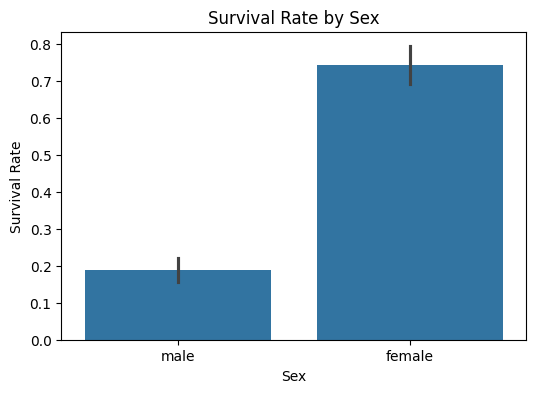

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by sex
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=titan_data)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()


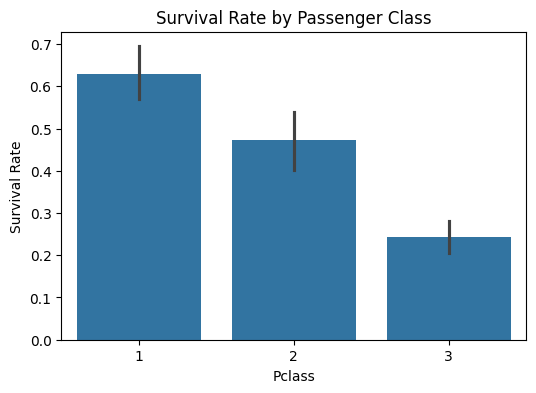

In [9]:
# Survival rate by Pclass
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=titan_data)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


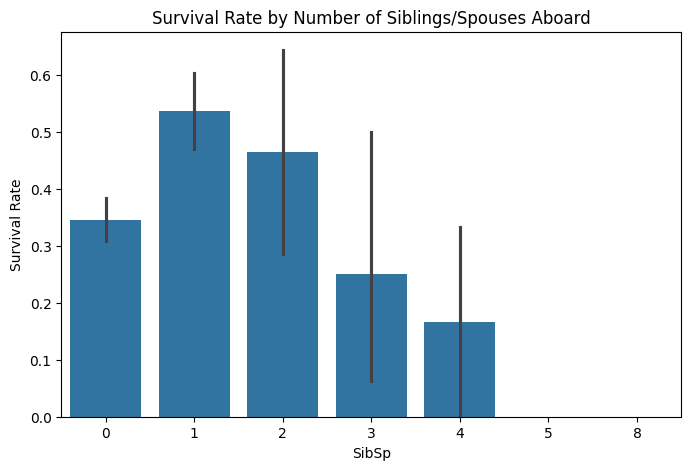

In [17]:
# Survival rate by SibSp (number of siblings or spouses aboard)
plt.figure(figsize=(8, 5))
sns.barplot(x='SibSp', y='Survived', data=titan_data)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()


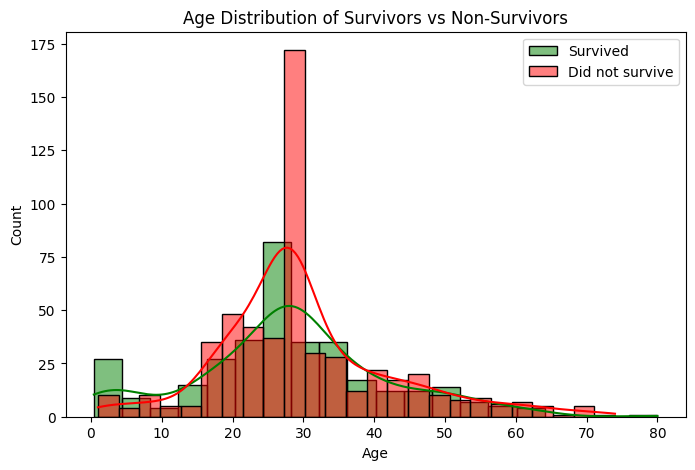

In [11]:
# Histogram of Age for Survivors vs Non-Survivors
plt.figure(figsize=(8, 5))
sns.histplot(titan_data[titan_data['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(titan_data[titan_data['Survived'] == 0]['Age'], kde=True, color='red', label='Did not survive')
plt.legend()
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.show()


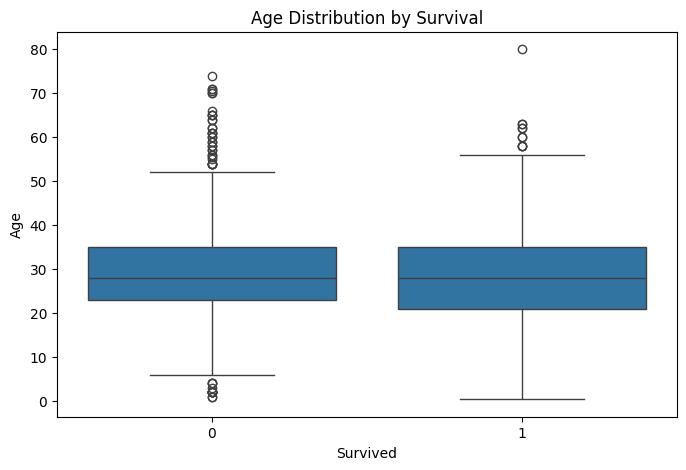

In [14]:
# Box plot for Age vs Survival
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=titan_data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


## Task 5: Feature Engineering
- Create a new column called 'Age Group' that divides passengers into age categories (e.g., 'Child', 'Adult', 'Senior').
- Use this new column to group passengers and calculate the survival rate for each age group.

### Hint:
Use Pandas' `pd.cut()` to create the 'Age Group' column and then `groupby()` to analyze survival rates.


Age Group
Child     0.539823
Adult     0.364362
Senior    0.269231
Name: Survived, dtype: float64


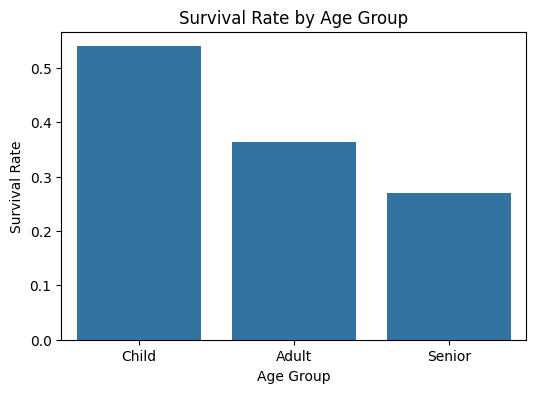

In [21]:
# Creating a new 'Age Group' column and calculating the survival rate for each age group

# Creating Age Group column
age_ranges = [0, 18, 60, 100]  # Age ranges
age_groups = ['Child', 'Adult', 'Senior']
titan_data['Age Group'] = pd.cut(titan_data['Age'], bins=age_ranges, labels=age_groups, right=False)

# Calculating survival rate by Age Group
survival_rate_by_age_group = titan_data.groupby('Age Group', observed=True)['Survived'].mean()

# Displaying survival rates
print(survival_rate_by_age_group)

# Visualizing the survival rate by Age Group
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_rate_by_age_group.index, y=survival_rate_by_age_group.values)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()
